<a href="https://colab.research.google.com/github/anish0045h/trashdetection/blob/main/trash_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

In [ ]:
zip_path = "/content/trash_dataset.zip"  # Use the actual filename you uploaded
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
!ls /content/dataset

data.yaml  test  train	valid


In [ ]:
!ls /content/dataset/images/train | head

ls: cannot access '/content/dataset/images/train': No such file or directory


In [ ]:
!ls /content/dataset/images/train

ls: cannot access '/content/dataset/images/train': No such file or directory


In [ ]:
!cat /content/dataset/data.yaml

train: train/images
val: valid/images
test: test/images

names: 
  0: Creature
  1: Garbage
  2: fish

In [ ]:
yaml_content = """
train: /content/dataset/train/images
val: /content/dataset/valid/images
test: /content/dataset/test/images

nc: 3
names: ["Creature", "Garbage", "fish"]
"""

with open("/content/dataset/data.yaml", "w") as f:
    f.write(yaml_content)

In [ ]:
!ls /content/dataset/train/images | head -5
!ls /content/dataset/train/labels | head -5

10_jpg.rf.678bda843c0fd66344873cd0110332a2.jpg
10_jpg.rf.6dc46ccb22287d228d9e2204ac716399.jpg
10_jpg.rf.9cd15b68f0afc717e46d561477cb817c.jpg
10_jpg.rf.ea9206ce66d30b1e46ae234543ed7012.jpg
10_jpg.rf.f4b6e7708c4e08233767fffbe5755fc5.jpg
10_jpg.rf.678bda843c0fd66344873cd0110332a2.txt
10_jpg.rf.6dc46ccb22287d228d9e2204ac716399.txt
10_jpg.rf.9cd15b68f0afc717e46d561477cb817c.txt
10_jpg.rf.ea9206ce66d30b1e46ae234543ed7012.txt
10_jpg.rf.f4b6e7708c4e08233767fffbe5755fc5.txt


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8s.pt")  # You can change to yolov8n.pt, yolov8m.pt etc.
model.train(
    data="/content/dataset/data.yaml",
    epochs=50,
    imgsz=512,
    batch=16,
    patience=5,
    lr0=0.001,
    lrf=0.01,
    fliplr=0.5,
    cache=True,
    mosaic=0.5,
    augment=True,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    verbose=True,
    val=True,
    save=True
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 235MB/s]


Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=0.5, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, pretrained=True

100%|██████████| 755k/755k [00:00<00:00, 24.7MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2117209  ultralytics.nn.modules.head.Detect           [3, [128, 256, 512]]          
Model summary: 129 layers, 11,136,761 parameters, 11,136,745 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 113MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 13.9±1.5 MB/s, size: 31.1 KB)


train: Scanning /content/dataset/train/labels... 3059 images, 1 backgrounds, 0 corrupt: 100%|██████████| 3059/3059 [00:03<00:00, 850.00it/s]

train: New cache created: /content/dataset/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (2.2GB RAM): 100%|██████████| 3059/3059 [00:11<00:00, 271.63it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 19.2±11.0 MB/s, size: 42.2 KB)


val: Scanning /content/dataset/valid/labels... 867 images, 1 backgrounds, 0 corrupt: 100%|██████████| 867/867 [00:01<00:00, 696.91it/s]

val: New cache created: /content/dataset/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.6GB RAM): 100%|██████████| 867/867 [00:02<00:00, 306.19it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.33G      1.364       2.09      1.538         11        512: 100%|██████████| 192/192 [00:43<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.11it/s]


                   all        867       1217      0.398      0.379      0.299      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.86G       1.56      1.975      1.673          5        512: 100%|██████████| 192/192 [00:40<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.45it/s]

                   all        867       1217      0.437      0.301      0.244      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.9G      1.586      1.986       1.71          6        512: 100%|██████████| 192/192 [00:39<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.21it/s]

                   all        867       1217      0.501      0.432      0.407       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.94G      1.552      1.895      1.682          4        512: 100%|██████████| 192/192 [00:39<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.73it/s]

                   all        867       1217      0.531      0.367      0.401       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.97G      1.494       1.84      1.642          6        512: 100%|██████████| 192/192 [00:39<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.23it/s]

                   all        867       1217      0.576      0.477      0.485      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.01G      1.432      1.678      1.591         11        512: 100%|██████████| 192/192 [00:39<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.78it/s]

                   all        867       1217       0.65      0.483      0.535      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.04G      1.398      1.645       1.57          6        512: 100%|██████████| 192/192 [00:39<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.37it/s]

                   all        867       1217      0.582      0.561      0.555      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.08G      1.381      1.558      1.549          5        512: 100%|██████████| 192/192 [00:39<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.33it/s]

                   all        867       1217      0.643      0.582      0.634      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.12G       1.33       1.51      1.521         11        512: 100%|██████████| 192/192 [00:39<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.79it/s]

                   all        867       1217      0.623       0.56      0.614      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.15G       1.31      1.453      1.499          4        512: 100%|██████████| 192/192 [00:40<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.18it/s]

                   all        867       1217      0.663        0.6      0.625      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.19G      1.284      1.418       1.48          9        512: 100%|██████████| 192/192 [00:40<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.85it/s]

                   all        867       1217      0.757      0.601      0.696      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.22G      1.269      1.391      1.474          8        512: 100%|██████████| 192/192 [00:40<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.56it/s]

                   all        867       1217      0.741       0.62      0.695      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.26G      1.269      1.368      1.472          6        512: 100%|██████████| 192/192 [00:39<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.24it/s]

                   all        867       1217      0.684      0.682      0.688      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       3.3G      1.246      1.356      1.443          7        512: 100%|██████████| 192/192 [00:39<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.75it/s]

                   all        867       1217      0.749      0.622        0.7      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.33G      1.247      1.321      1.432          7        512: 100%|██████████| 192/192 [00:39<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.22it/s]

                   all        867       1217      0.738      0.666      0.714      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.37G      1.209      1.283      1.426          3        512: 100%|██████████| 192/192 [00:40<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.57it/s]

                   all        867       1217      0.718      0.688      0.723      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.41G      1.188      1.219      1.417          7        512: 100%|██████████| 192/192 [00:39<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.84it/s]

                   all        867       1217      0.775      0.641      0.709      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.44G      1.184      1.199      1.404         14        512: 100%|██████████| 192/192 [00:39<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.28it/s]

                   all        867       1217      0.804      0.634       0.74      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.48G      1.186      1.188      1.408         11        512: 100%|██████████| 192/192 [00:40<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.80it/s]

                   all        867       1217      0.752      0.711      0.753      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.52G       1.16      1.165      1.395         11        512: 100%|██████████| 192/192 [00:40<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.40it/s]

                   all        867       1217      0.765      0.736      0.756      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.57G      1.142      1.144       1.38         11        512: 100%|██████████| 192/192 [00:40<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.34it/s]

                   all        867       1217       0.77      0.724      0.765      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.66G      1.148      1.125      1.384          3        512: 100%|██████████| 192/192 [00:39<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.95it/s]

                   all        867       1217      0.763      0.706      0.758      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.91G      1.118      1.094      1.365          3        512: 100%|██████████| 192/192 [00:39<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.24it/s]

                   all        867       1217      0.796      0.689      0.772      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.95G      1.133      1.092      1.355         15        512: 100%|██████████| 192/192 [00:40<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.82it/s]

                   all        867       1217      0.759      0.754      0.808      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.98G      1.103      1.038      1.345          6        512: 100%|██████████| 192/192 [00:40<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.64it/s]

                   all        867       1217      0.787      0.715      0.785      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.02G      1.099      1.043      1.337         17        512: 100%|██████████| 192/192 [00:39<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.31it/s]

                   all        867       1217      0.753       0.79      0.816      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.06G      1.085      1.026      1.328          5        512: 100%|██████████| 192/192 [00:40<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.85it/s]

                   all        867       1217       0.78      0.733      0.792      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.09G      1.066      1.001      1.326         10        512: 100%|██████████| 192/192 [00:39<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.18it/s]

                   all        867       1217      0.796      0.751      0.799      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.13G      1.061     0.9789      1.308          5        512: 100%|██████████| 192/192 [00:40<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.62it/s]

                   all        867       1217      0.851      0.726      0.811      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.17G      1.052     0.9687      1.303         11        512: 100%|██████████| 192/192 [00:40<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.84it/s]

                   all        867       1217      0.782       0.73      0.815      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.23G      1.036     0.9428      1.301          5        512: 100%|██████████| 192/192 [00:40<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.32it/s]

                   all        867       1217      0.845      0.735      0.823      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       4.3G       1.04     0.9399        1.3          6        512: 100%|██████████| 192/192 [00:40<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.87it/s]

                   all        867       1217       0.88       0.72      0.832      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.37G      1.025     0.9301      1.295          5        512: 100%|██████████| 192/192 [00:40<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.64it/s]

                   all        867       1217      0.827      0.739      0.809      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.43G      1.003     0.8926      1.277          3        512: 100%|██████████| 192/192 [00:40<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.32it/s]

                   all        867       1217      0.813      0.752       0.83      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       4.5G      1.003     0.8802      1.279          8        512: 100%|██████████| 192/192 [00:40<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.78it/s]

                   all        867       1217      0.818      0.765      0.821      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.57G     0.9963     0.8881      1.274          5        512: 100%|██████████| 192/192 [00:40<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.39it/s]

                   all        867       1217      0.812      0.761      0.831      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.64G     0.9983     0.8812      1.269         36        512: 100%|██████████| 192/192 [00:39<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.52it/s]

                   all        867       1217      0.813       0.77       0.83       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.67G     0.9835     0.8505      1.258          4        512: 100%|██████████| 192/192 [00:39<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.85it/s]

                   all        867       1217      0.834      0.762      0.823      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.73G     0.9889     0.8669      1.266         12        512: 100%|██████████| 192/192 [00:39<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.32it/s]

                   all        867       1217      0.829      0.783      0.841      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.82G     0.9642     0.8315      1.248         11        512: 100%|██████████| 192/192 [00:39<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.95it/s]

                   all        867       1217      0.867      0.749      0.839      0.605


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       4.9G     0.8323     0.6137      1.167          4        512: 100%|██████████| 192/192 [00:39<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.43it/s]

                   all        867       1217       0.86      0.754      0.845       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.94G     0.8288      0.598      1.158          5        512: 100%|██████████| 192/192 [00:38<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.87it/s]

                   all        867       1217      0.835      0.765      0.847      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         5G     0.8133     0.5646       1.15          3        512: 100%|██████████| 192/192 [00:37<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.41it/s]

                   all        867       1217      0.826      0.748      0.824      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.05G      0.801     0.5632      1.139          3        512: 100%|██████████| 192/192 [00:38<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.90it/s]

                   all        867       1217      0.842      0.768      0.844      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.14G      0.784     0.5392      1.134          5        512: 100%|██████████| 192/192 [00:37<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.40it/s]

                   all        867       1217       0.83      0.803      0.853      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.18G     0.7681     0.5254       1.12          6        512: 100%|██████████| 192/192 [00:38<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.92it/s]

                   all        867       1217      0.841      0.762      0.843      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.27G     0.7686     0.5219       1.12          5        512: 100%|██████████| 192/192 [00:38<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.46it/s]

                   all        867       1217      0.855      0.759      0.838      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.34G     0.7524     0.5098      1.111          3        512: 100%|██████████| 192/192 [00:38<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.93it/s]

                   all        867       1217      0.853       0.76      0.844       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       5.4G     0.7501     0.5038      1.106          3        512: 100%|██████████| 192/192 [00:37<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.65it/s]

                   all        867       1217      0.839      0.785      0.858      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.44G     0.7352     0.4864      1.102          3        512: 100%|██████████| 192/192 [00:37<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.68it/s]

                   all        867       1217      0.826      0.784       0.85      0.628



50 epochs completed in 0.645 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:11<00:00,  2.49it/s]


                   all        867       1217      0.883      0.768      0.868      0.654
              Creature         61         64      0.824      0.766      0.827      0.641
               Garbage        504        617       0.91      0.809       0.91      0.654
                  fish        305        536      0.914      0.729      0.868      0.668
Speed: 0.1ms preprocess, 8.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x798d60e6ca50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
!ls /content/runs/detect/train

args.yaml			 R_curve.png	      train_batch7682.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1.jpg     val_batch1_pred.jpg
labels.jpg			 train_batch2.jpg     val_batch2_labels.jpg
P_curve.png			 train_batch7680.jpg  val_batch2_pred.jpg
PR_curve.png			 train_batch7681.jpg  weights


In [ ]:
!zip -r /content/yolo_trained_model.zip /content/runs/detect/train

  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 11%)
  adding: content/runs/detect/train/P_curve.png (deflated 11%)
  adding: content/runs/detect/train/confusion_matrix.png (deflated 29%)
  adding: content/runs/detect/train/val_batch2_pred.jpg (deflated 11%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 8%)
  adding: content/runs/detect/train/train_batch7680.jpg (deflated 6%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 10%)
  adding: content/runs/detect/train/R_curve.png (deflated 11%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train/F1_curve.png (deflated 10%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 8%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 6%)
  ad

In [ ]:
from google.colab import files
files.download('/content/yolo_trained_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")

In [ ]:
results = model.predict(source="/content/Sharks.jpeg", save=True, conf=0.25)


image 1/1 /content/Sharks.jpeg: 512x512 1 fish, 18.8ms
Speed: 6.5ms preprocess, 18.8ms inference, 2.3ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict


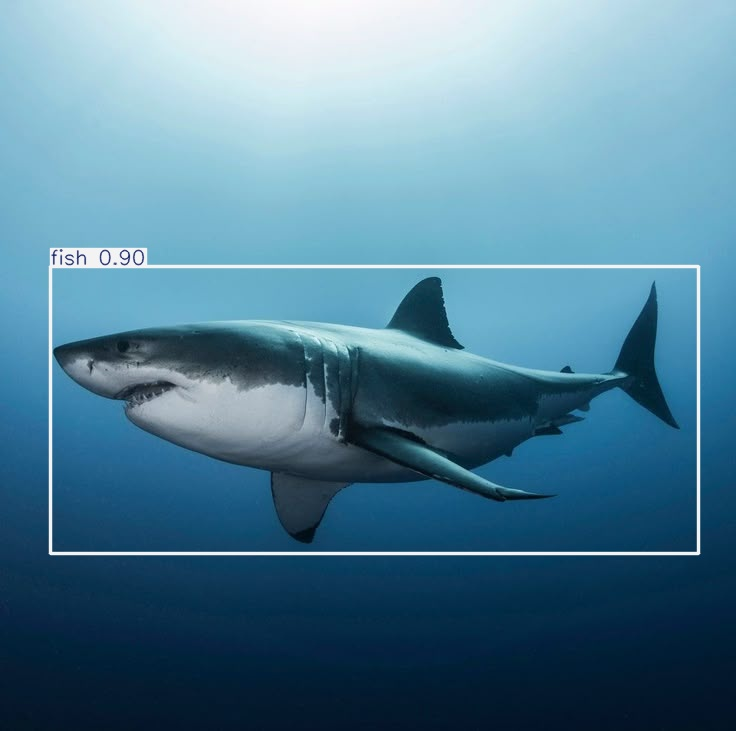

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/runs/detect/predict/Sharks.jpg'))